# Task 6: K-Nearest Neighbors (KNN) Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [3]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

K=1 → Accuracy: 0.9778


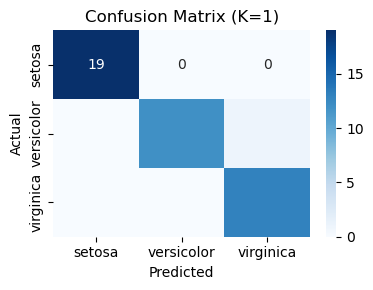

K=3 → Accuracy: 1.0000


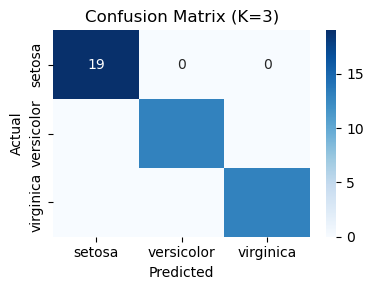

K=5 → Accuracy: 1.0000


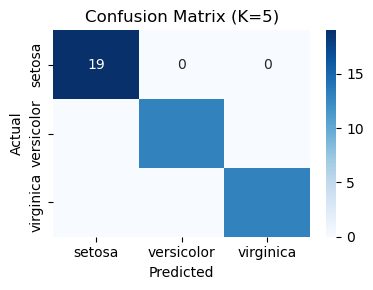

K=7 → Accuracy: 1.0000


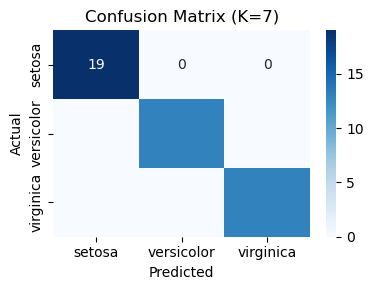

In [8]:
# Try different K values
k_values = [1, 3, 5, 7]
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K={k} → Accuracy: {acc:.4f}")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.title(f"Confusion Matrix (K={k})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

In [11]:
# Plot decision boundary using only 2 features (for visualization)
X_vis = X_scaled[:, :2]  # use only first 2 features
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.3, random_state=42)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_vis, y_train_vis)

KNeighborsClassifier()

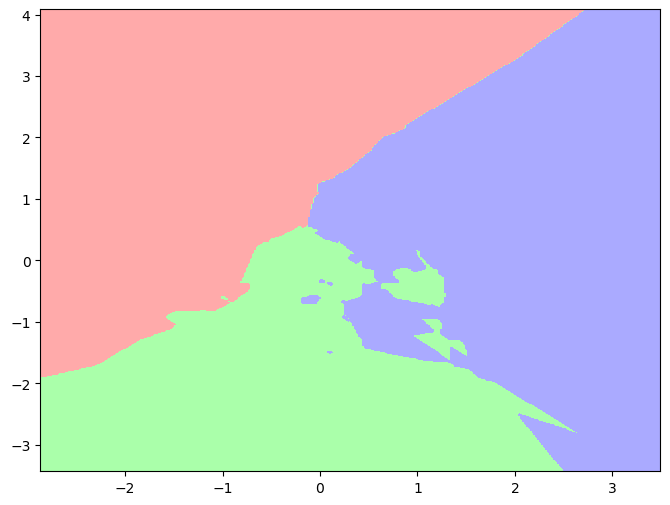

In [13]:
# Plot decision regions
from matplotlib.colors import ListedColormap
h = 0.02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']
plt.contourf(xx, yy, Z, cmap=cmap_light)

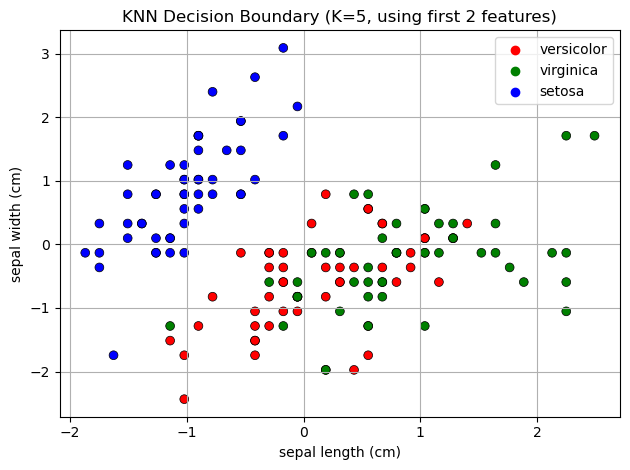

In [14]:
# Plot only the training + testing data used in 2D
X_combined = np.vstack((X_train_vis, X_test_vis))
y_combined = np.hstack((y_train_vis, y_test_vis))
sns.scatterplot(x=X_combined[:, 0], y=X_combined[:, 1],hue=[iris.target_names[i] for i in y_combined],palette=cmap_bold, edgecolor='k', s=40)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("KNN Decision Boundary (K=5, using first 2 features)")
plt.grid(True)
plt.tight_layout()
plt.show()